# Handgeschriebene Ziffern

Der beiliegenden Beschreibung der Daten habe ich entnommen, dass es sich um handgeschriebene Ziffern handelt. Die mit 16x16 Bildpunkten abgespeichert sind. Der Beschreibung kann ich weiter entnehmen:

*"The data are in two gzipped files, and each line consists of the digit
id (0-9) followed by the 256 grayscale values."*

Es handelt sich also um eine Textdatei in der in jeder Zeile der Wert der geschriebenen Ziffer sowie die 16x16 = 256 Bildpunkte stehen.

** Mein Ziel ist es eine Maschine zu bauen, die anhand der Bilddaten (digitalisierten Form der geschriebenen Werte) erkennt, um welche Zahl es sich handelt. **

*** Wie komme ich dahin? ***
- Zunächst lese ich die Daten ein
- Ich berechne einfache empirische Statistiken (Anzahl der Beispiele, Mittelwerte,...) zur Beschreibung des Datensatzes
- Ich analysiere die Daten auf bestimmte Muster
- Ich probiere verschiedene Verfahren des maschinellen Lernens zur automatischen identifizierung der Ziffern aus
- Ich validiere meine Ergebnisse und entscheide mich für ein Vorgehen
- Aus meinem Prototypen entwickle ich eine optimierte und stabile Version, "eine Maschine"
- Ich lege Parameter fest an denen ich erkennen will, ob meine Maschine noch läuft
- Ich deploye meine Maschiene!
- Ich beobachte ob alles richtig läuft anhand der zuvor definierten Parameter

Ok, soweit sind wir noch nicht, also ein paar Rollen zurück!

----

## Daten Einlesen

Wenn wir davon sprechen die Daten einzulesen, dann meinen wir Zugriff auf die Daten zu erhalten. D.h. zumindest einen Teil der Daten muss in den Hauptspeicher (RAM) des verarbeitenden Rechners geladen werden. 

Warum so kompliziert ausgedrück?

Wenn die Datenmengen zu groß werden, dann lesen wir die Daten evtl. mit Hilfe von mehreren Rechnern ein, bearbeiten sie auf dem jeweiligen Rechner und sammeln die reduzierte kompaktere Form auf einem Rechner. Letzteres wird gemacht, um die reduzierten Daten interaktiv zu bearbeiten oder zu visualisieren.

Für jetzt gilt aber erstmal. Wir wollen die Daten in den Hauptspeicher unseres Rechners einlesen, um sie hier in diesem Notebook zu verarbeiten. Das geht solange gut, so lange die Daten nicht größer als der freie Hauptspeicher sind.

**Wir könnten die einfachen Funktionen von Python nutzen um die Daten einzulesen**

In [1]:
f = open("../data/zip.train", "r") # öffnet die Datei
file_content = f.read(100) # liest die ersten 100 Zeichen der Datei

In [2]:
file_content

'6.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -0.6310 0.8620 -0.1670 -1.0000 -1.000'

Weil es ziemlich aufwendig ist diese Zeichenfolge zu 'interpretieren' nutzen wir Funktionen aus **pandas** um dies für uns zu tun:

In [3]:
import pandas as pd

In [4]:
# mit header=None, wird die erste Zeile der Datei nicht als Header interpretiert 
#              (Man könnte den Header in einem solchen Fall als Zeile mit den Spaltenüberschriften bezeichnen)
# mit sep=" ", geben wir an, dass wir das Leerzeichen als Seperator verwenden wollen. 
#              D.h. zwei durch ein Leerzeichen separierte Werte sollen als zwei Werte eingelesen werden.
data = pd.read_csv("../data/zip.train", header=None, sep=" ") 

In [5]:
data.head() # head gibt den "Kopf" der Datei aus, oder die ersten fünf Zeilen

,0,1,2,3,4,5,6,7,8,9,...,248,249,250,251,252,253,254,255,256,257
0,6.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-0.631,0.862,...,0.823,1.000,0.482,-0.474,-0.991,-1.000,-1.000,-1.000,-1.0,NaN
1,5.0,-1.0,-1.0,-1.0,-0.813,-0.671,-0.809,-0.887,-0.671,-0.853,...,-0.671,-0.033,0.761,0.762,0.126,-0.095,-0.671,-0.828,-1.0,NaN
2,4.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-0.109,1.000,-0.179,-1.000,-1.000,-1.000,-1.0,NaN
3,7.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.273,0.684,0.960,0.450,...,1.000,0.536,-0.987,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,NaN
4,3.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.928,-0.204,0.751,0.466,...,0.639,1.000,1.000,0.791,0.439,-0.199,-0.883,-1.000,-1.0,NaN


Wie wir sehen, sind die Daten nun bereits strukturiert. Sie wurden in ein Objekt der Klasse **DataFrame** aus dem pandas Packet eingelesen. Die DateFrame Klasse bietet viele Funktionen, um z.B. auf Teilbereiche (wie z.B. Spalten) zuzugreifen oder statistische Auswertungen durchzuführen.

Wenn wir uns die Ausgabe oben anschauen, ist zu erkennen, dass in der letzten Spalte (257) immer der Wert *NaN* steht. NaN steht für 'Not a number'. Hier ist beim einlesen offensichtlich etwas schief gelaufen! Wir wollen das fixen!

In [6]:
cleaned_data = data.iloc[:,:-1] # mit [:,:-1] wählen wir alle Zeilen, und alle bis auf die Letzte (-1) Spalten aus 

**TODO:** Ersetze mit eleganter Lösung

Um einen groben Überblick über die in dem Datensatz enthaltenen Daten zu bekommen lesen wir das Attribut **shape** aus und rufen wir die Funktion und **describe** auf:

In [7]:
cleaned_data.shape

(7291, 257)

In [8]:
cleaned_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,256
count,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,...,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000
mean,3.903443,-0.996417,-0.981138,-0.951153,-0.887738,-0.773468,-0.610302,-0.368991,-0.045769,-0.052641,...,-0.198547,0.139823,0.116439,-0.314108,-0.653711,-0.837858,-0.922194,-0.957393,-0.979290,-0.994678
std,2.996386,0.051713,0.151202,0.244264,0.360516,0.502659,0.628710,0.716032,0.768304,0.752979,...,0.772895,0.752984,0.757336,0.725859,0.582555,0.414646,0.300830,0.228700,0.158998,0.066056
min,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.999000,-0.950000,...,-1.000000,-0.661500,-0.738000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,4.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.719000,0.061000,0.002000,...,-0.353000,0.368000,0.336000,-0.579000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
75%,7.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.962000,-0.391000,0.254500,0.696000,0.674500,...,0.554000,0.835000,0.815000,0.346000,-0.504500,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
max,9.000000,0.638000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.592000


Aus der Beschreibung der Daten wissen wir, dass es sich um die Ziffern und die dazugehörigen Bilder der Größe 16x16 Pixel handelt. Also in jeder Zeile steht in der 0-ten Spalte die Ziffer und in den folgenden 256 Spalten die einzelnen Pixel der Bilder. Also visualisieren wir diese nun einmal.

In [9]:
import matplotlib.pyplot as plt

Dazu definiere ich mir zwei Hilfsfunktionen:

In [10]:
def getNumber(data, digit):
    # wähle alle Zeilen in denen die erste Spalte (Spalte mit den Ziffer) mit 'digit' übereinstimmt
    data_number = pd.DataFrame(data[data[0] == digit]) 
    # schneide die erste Spalte weg und gebe den rest zurück
    separated_data = data_number.iloc[:,1:]
    return separated_data


In [11]:
def getNumberImage(data, digit, aggregation):
    # ruft die Hilfsfunktion getNumber auf um alle Bilddaten Daten zu einer Ziffer zu holen
    image_data = getNumber(data, digit)
    # bilde aus allen Bildern zu der einen Ziffer ein aggrigiertes Bild
    if(aggregation == 'median'):
        df1 = pd.DataFrame(image_data.median())
    else:
        df1 = pd.DataFrame(image_data.mean())        
    
    # wandle das format von (1,256) -> (16,16) und gebe diesen transformierten DataFrame zurück
    return df1.values.reshape(16,16)

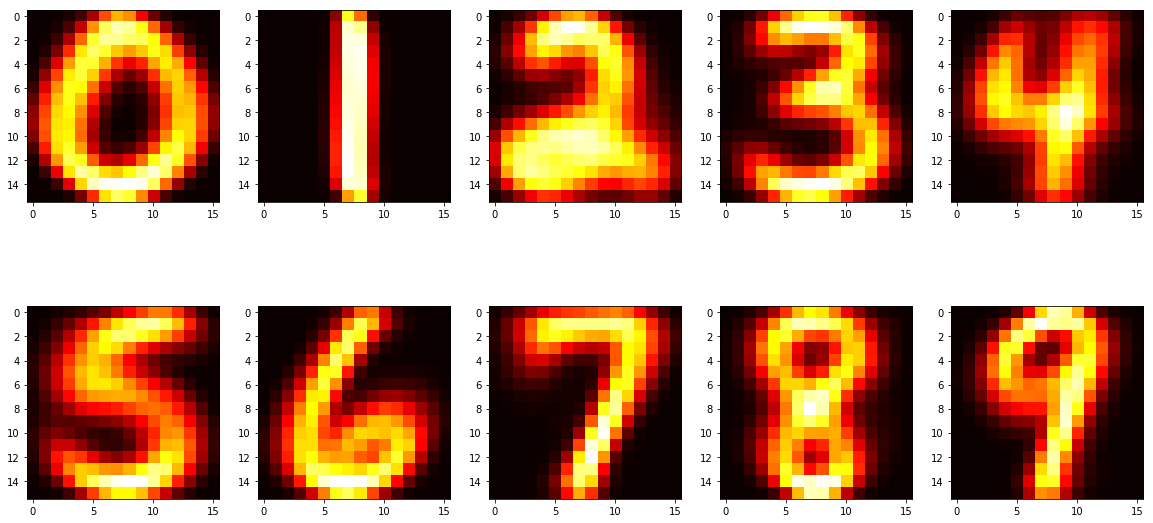

In [12]:
plt.figure(1, figsize=(20, 10))

for i in range(0,10):
    image = getNumberImage(cleaned_data,i,'mean')
    
    # Call signature: subplot(nrows, ncols, index, **kwargs)
    plt.subplot(2,5, 1 + i)
    plt.imshow(image, cmap='hot', interpolation='none')

plt.show();

-----